# YOLOv3 커스텀 데이터 학습

copy from https://articlearn.id/article/e5571bb0-how-to-train-yolov3-on-google-colab-to-de/

# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# 임포트

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob


# Darknet 다운받아서 컴파일

## 프로젝트 다운로드

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15457, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15457 (delta 4), reused 21 (delta 2), pack-reused 15424
Receiving objects: 100% (15457/15457), 14.12 MiB | 7.62 MiB/s, done.
Resolving deltas: 100% (10367/10367), done.


OpenCV, GPU, CuDNN 사용 관련 설정하고 컴파일

In [ ]:
%cd darknet

/content/darknet


## 컴파일 설정 파일 수정

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile

## 컴파일

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

# 데이터 준비
- darknet/data/obj에 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성


## 데이터 파일 카피

In [ ]:
!cp /gdrive/MyDrive/tmp/Raccoon.zip ./

## 압축 풀기

In [ ]:
!rm -rf data/obj
!mkdir data/obj
!unzip Raccoon.zip -d data/obj

Archive:  Raccoon.zip
   creating: data/obj/Raccoon/
  inflating: data/obj/__MACOSX/._Raccoon  
  inflating: data/obj/Raccoon/README.roboflow.txt  
  inflating: data/obj/__MACOSX/Raccoon/._README.roboflow.txt  
   creating: data/obj/Raccoon/valid/
  inflating: data/obj/__MACOSX/Raccoon/._valid  
  inflating: data/obj/Raccoon/README.dataset.txt  
  inflating: data/obj/__MACOSX/Raccoon/._README.dataset.txt  
   creating: data/obj/Raccoon/test/
  inflating: data/obj/__MACOSX/Raccoon/._test  
   creating: data/obj/Raccoon/train/
  inflating: data/obj/__MACOSX/Raccoon/._train  
   creating: data/obj/Raccoon/export/
  inflating: data/obj/__MACOSX/Raccoon/._export  
  inflating: data/obj/Raccoon/valid/raccoon-95_jpg.rf.f8c8616fc565907a66c86128839a766b.jpg  
  inflating: data/obj/__MACOSX/Raccoon/valid/._raccoon-95_jpg.rf.f8c8616fc565907a66c86128839a766b.jpg  
  inflating: data/obj/Raccoon/valid/raccoon-82_jpg.rf.00ff88031083cd95bc62294500428bb0.jpg  
  inflating: data/obj/__MACOSX/Raccoon/val

## 학습 위한 설정 파일 생성

### data/obj.names

In [ ]:
%%writefile data/obj.names
Racoon

Overwriting data/obj.names


In [ ]:
!cat data/obj.names

Racoon

In [ ]:
!cp data/obj.names data/coco.names

### data/obj.data

In [ ]:
%%writefile data/obj.data
classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = ./

Overwriting data/obj.data


In [ ]:
!cat data/obj.data

classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = ./

### data/train.txt


In [ ]:
!ls -al data/obj/Raccoon/train

total 5304
drwxr-xr-x 2 root root 36864 Jul 11 06:20 .
drwxr-xr-x 6 root root  4096 Jul 11 06:19 ..
-rw-r--r-- 1 root root     7 Jun  8  2021 _darknet.labels
-rw-r--r-- 1 root root 29260 Jul 11 04:56 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.txt
-rw-r--r-- 1 root root 34570 Jul 11 04:56 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.txt
-rw-r--r-- 1 root root 30824 Jul 11 04:56 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.txt
-rw-r--r-- 1 root root 45941 Jul 11 04:56 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.jpg
-rw-r--r-- 1 root root    77 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.txt
-rw-r--r-- 1 root root 19239 Jul 11 04:56 raccoon-104_jpg.

In [ ]:
# ls -al data/obj/Raccoon 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/laptops_labeled/*[jpg|png|jpeg]")
images_list = glob.glob("data/obj/Raccoon/train/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

['data/obj/Raccoon/train/raccoon-112_jpg.rf.096e4a5594f3bc496cd5d3d7379e97e0.jpg', 'data/obj/Raccoon/train/raccoon-177_jpg.rf.1ffe2bcc19c2311f8c8d4ace8932a88d.jpg', 'data/obj/Raccoon/train/raccoon-39_jpg.rf.e3e19cc56f672e57edb42749564d2a3d.jpg', 'data/obj/Raccoon/train/raccoon-45_jpg.rf.fa6b0fabef2ed4f9e9dd6b164792d373.jpg', 'data/obj/Raccoon/train/raccoon-55_jpg.rf.5b221bf351955c14e80459a380fa2da0.jpg', 'data/obj/Raccoon/train/raccoon-182_jpg.rf.0ee4a4d4fa828093cffc43bc3ea07a8e.jpg', 'data/obj/Raccoon/train/raccoon-108_jpg.rf.b1c0928dfe114cfbd882e12141203f21.jpg', 'data/obj/Raccoon/train/raccoon-176_jpg.rf.710df90ee6b4d97ad62923a0a38517f5.jpg', 'data/obj/Raccoon/train/raccoon-152_jpg.rf.dcee9be6791185d580a7c06474e1e206.jpg', 'data/obj/Raccoon/train/raccoon-38_jpg.rf.d72bfc74df002a90d04736fa40265fd9.jpg', 'data/obj/Raccoon/train/raccoon-114_jpg.rf.61a417d19d8044073beb206aa2db9f44.jpg', 'data/obj/Raccoon/train/raccoon-117_jpg.rf.b05cd921b42a5dda682dcc870518e462.jpg', 'data/obj/Raccoon/t

In [ ]:
!cat data/train.txt

data/obj/Raccoon/train/raccoon-112_jpg.rf.096e4a5594f3bc496cd5d3d7379e97e0.jpg
data/obj/Raccoon/train/raccoon-177_jpg.rf.1ffe2bcc19c2311f8c8d4ace8932a88d.jpg
data/obj/Raccoon/train/raccoon-39_jpg.rf.e3e19cc56f672e57edb42749564d2a3d.jpg
data/obj/Raccoon/train/raccoon-45_jpg.rf.fa6b0fabef2ed4f9e9dd6b164792d373.jpg
data/obj/Raccoon/train/raccoon-55_jpg.rf.5b221bf351955c14e80459a380fa2da0.jpg
data/obj/Raccoon/train/raccoon-182_jpg.rf.0ee4a4d4fa828093cffc43bc3ea07a8e.jpg
data/obj/Raccoon/train/raccoon-108_jpg.rf.b1c0928dfe114cfbd882e12141203f21.jpg
data/obj/Raccoon/train/raccoon-176_jpg.rf.710df90ee6b4d97ad62923a0a38517f5.jpg
data/obj/Raccoon/train/raccoon-152_jpg.rf.dcee9be6791185d580a7c06474e1e206.jpg
data/obj/Raccoon/train/raccoon-38_jpg.rf.d72bfc74df002a90d04736fa40265fd9.jpg
data/obj/Raccoon/train/raccoon-114_jpg.rf.61a417d19d8044073beb206aa2db9f44.jpg
data/obj/Raccoon/train/raccoon-117_jpg.rf.b05cd921b42a5dda682dcc870518e462.jpg
data/obj/Raccoon/train/raccoon-101_jpg.rf.a9e8a95f51d60d

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-07-11 06:56:15--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.4MB/s    in 8.3s    

2022-07-11 06:56:24 (18.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [ ]:
# 탐지 대상 클래스 수를 설정
CLASS_NUM = 1

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

classes = CLASS_NUM
filters = (classes + 5) * 3
# max_batches = classes * 2000
max_batches = classes * 1000
steps1 = int(max_batches*0.8)
steps2 = int(max_batches*0.9)
# if max_batches < 6000:
#   max_batches = 6000

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg
!sed -i '610 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '696 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '783 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '603 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '689 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '776 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i 's/steps=400000,450000/steps=$steps1,$steps2/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  ./yolov3_custom_last.weights 로 저장된다.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show 
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 64459, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.718139), count: 4, class_loss = 0.899543, iou_loss = 0.294513, total_loss = 1.194056 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 64463, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.820429), count: 5, class_loss = 0.475165, iou_loss = 0.196339, total_loss = 0.671504 
v3 (mse loss, Normaliz

## 7. 탐지 실행

In [ ]:
!./darknet detect cfg/yolov3_custom.cfg ./yolov3_custom_last.weights data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

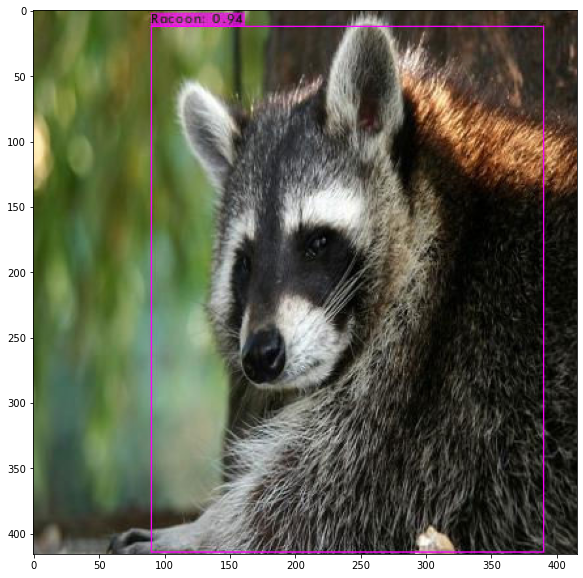

In [ ]:
pred = plt.imread('predictions.jpg')
plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.show()

In [ ]:
!cp ./yolov3_custom_last.weights /gdrive/MyDrive/tmp/